Question 1 : Linear Regression on Salary_dataset

In [39]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
#reading the dataset using pandas
sdata = pd.read_csv('/Users/chandanakatta/Downloads/datasets/Salary_Data.csv') 

In [41]:
#data analyzing
#displays the top 5 rows of the data
sdata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [42]:
# .info provides some information about the columns in the data
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [43]:
#describe() - it describes the basic statistics behind the dataset used 
sdata.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Figure size 1200x600 with 0 Axes>

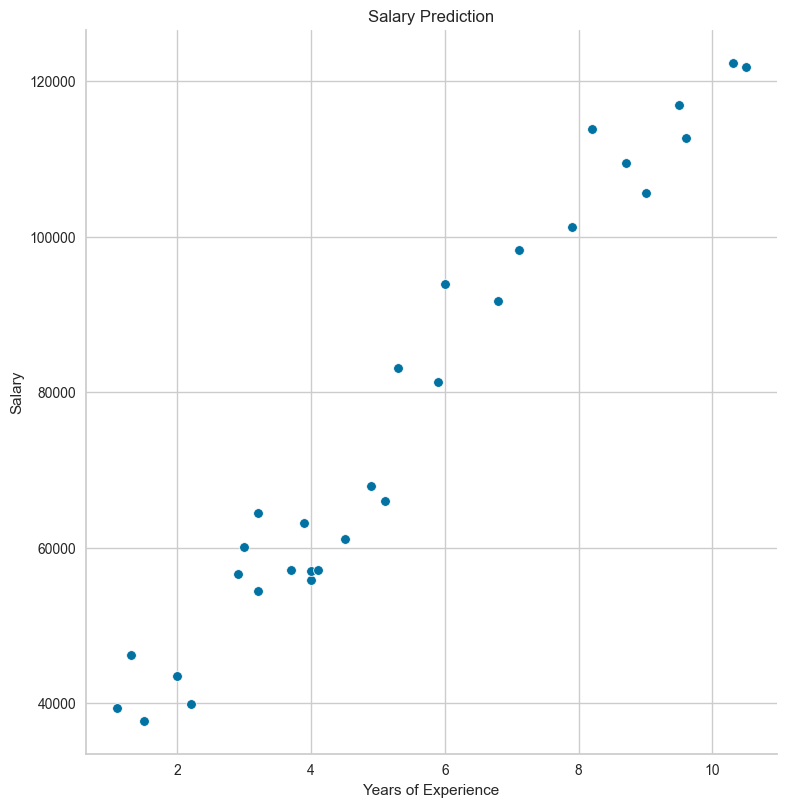

In [44]:

#Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset
plt.figure(figsize=(12,6))
sns.pairplot(sdata,x_vars=['YearsExperience'],y_vars=['Salary'],height=8,kind='scatter')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [45]:

X = sdata['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [46]:

y = sdata['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [47]:
#import train_test_split functiom to segregate data from scikit learn
from sklearn.model_selection import train_test_split


In [48]:
# Split the data for train and test , 0.7 train size means 2/3 rd of train data and remainig 1/3rd as test data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [49]:
# Create new axis for x column
X_train = np.array(X_train)[:,np.newaxis]
X_test = np.array(X_test)[:,np.newaxis]

In [50]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [51]:

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
# Predicting the Salary for the Test values
y_pred = lr.predict(X_test)

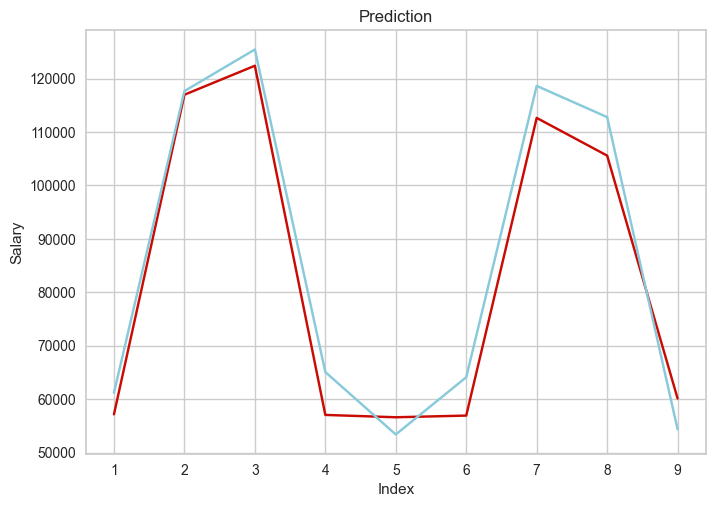

In [53]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='c',linestyle='-')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Prediction')
plt.show()

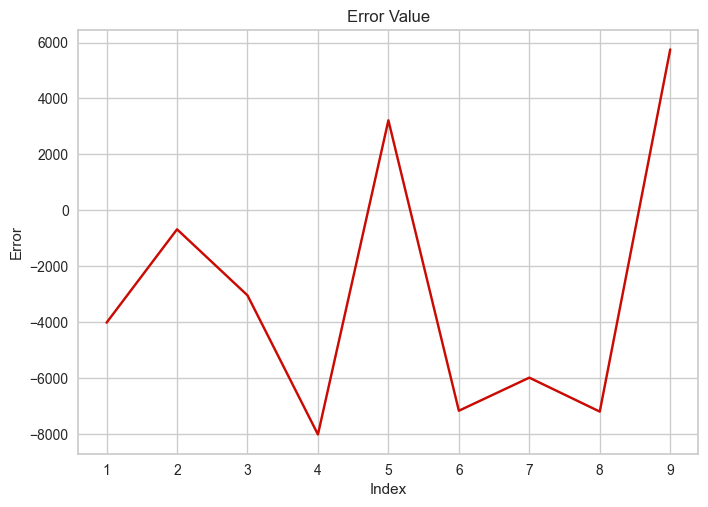

In [54]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='r',linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [55]:
# calculate Mean square error 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)


In [56]:
from sklearn.metrics import r2_score
# Calculate R square value
rsq = r2_score(y_test,y_pred)

In [57]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 30310299.043402452
r square : 0.9627668685473267


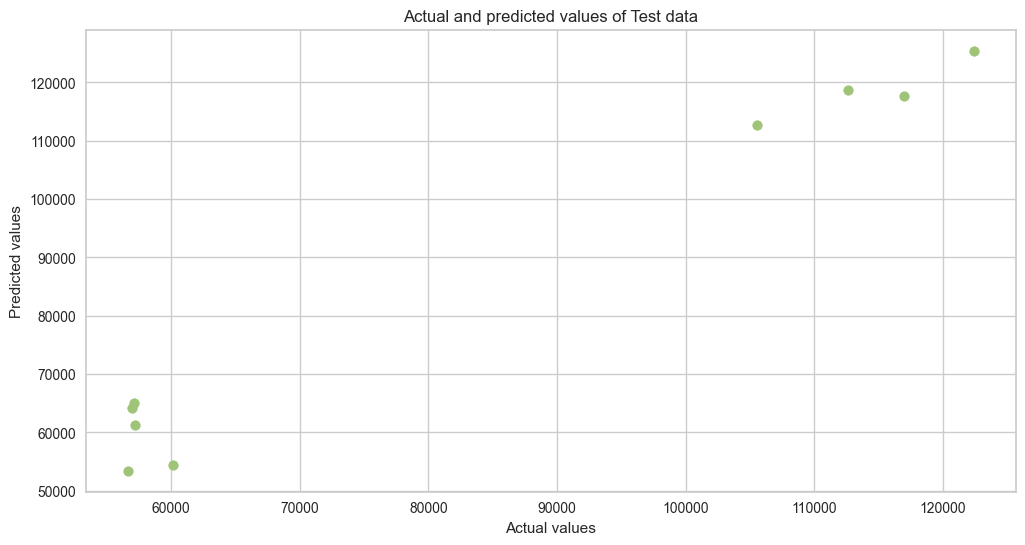

In [58]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='g')
plt.title('Actual and predicted values of Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()




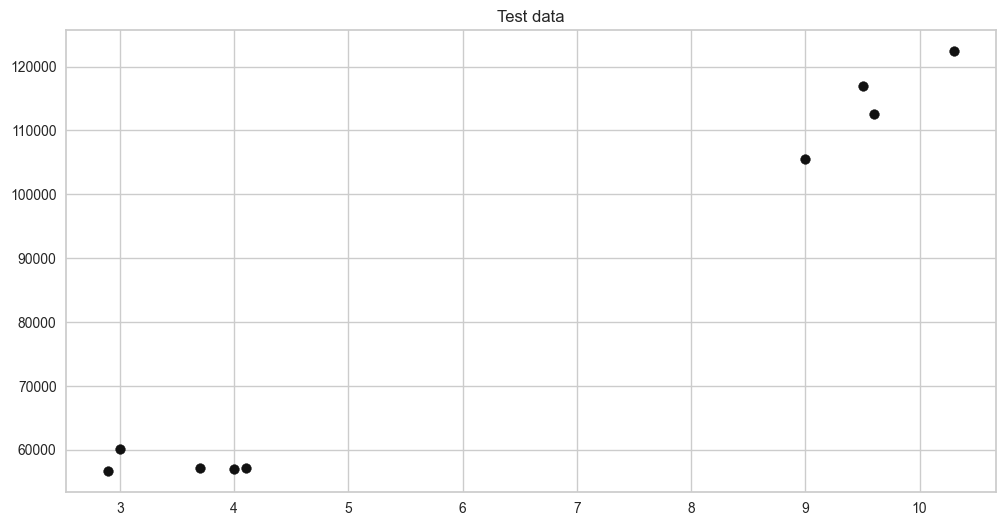

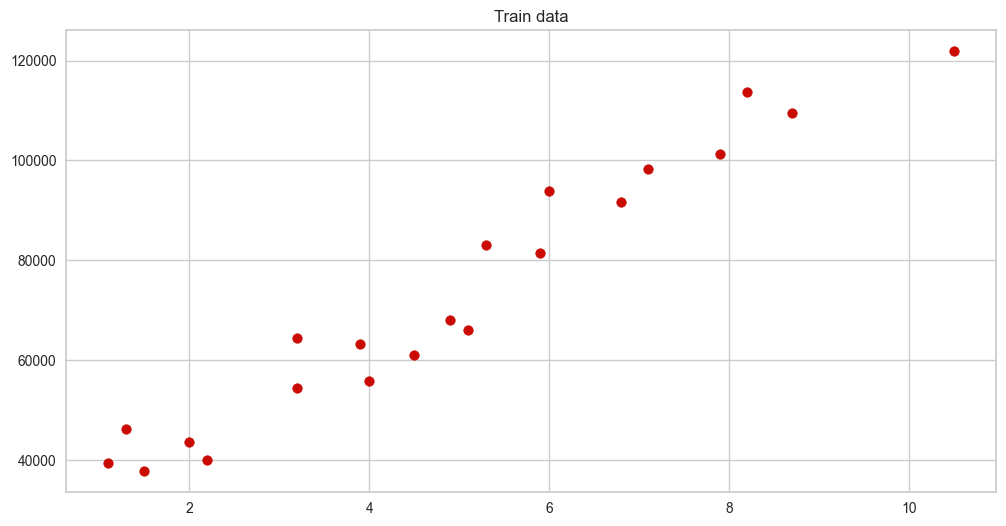

In [59]:
# Visualising the Test set results
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='k')
plt.title('Test data')
plt.show()
# Visualising the Training set results
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train,color='r')
plt.title('Train data')
plt.show()

Question 2 : K means clustering on Credit card dataset


Question 3 Feature scaling


In [60]:

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#t-SNE visualization
from sklearn.manifold import TSNE

#imputation
from sklearn.impute import KNNImputer

#Scaling
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#K-means for Clustering
from sklearn.cluster import KMeans

#Elbow method
from yellowbrick.cluster import KElbowVisualizer

#cluster metrics to find silhouette_score
from sklearn.metrics import silhouette_score

# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [61]:
#load and analyze the data
cc_data = pd.read_csv('/Users/chandanakatta/Downloads/datasets/K-mean_Dataset.csv')
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [62]:

cc_data.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [63]:
#Checking for missing values using isna().sum()
cc_data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#Check for outliers:
Using interquartile ranege(IQR) following the below approach to find outliers:

1.Calculate the first and third quartile (Q1 and Q3).
2.Evaluate the interquartile range, IQR = Q3-Q1.
3.Estimate the lower bound, the lower bound = Q1*1.5
4.Estimate the upper bound, upper bound = Q3*1.5
5.Outliers are the data points that lie outside of the lower and the upper bound


In [64]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [65]:
non_categorical_data = cc_data.drop(['CUST_ID'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


In [66]:
#Preprocessing by 1.removing outliers , 2.scaling the data and 3.reducing dimensions using PCA
#1.setting all outliers as NaN
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan
    
non_categorical_data.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [67]:
#Imputing the missing data using the mean value from n_neighbors nearest neighbors found in the training set.
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [68]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [69]:
#2.scaling the Data using StandardScaler

from sklearn.preprocessing import StandardScaler
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,6.351220e-17,3.048586e-16,7.303903e-17,1.365512e-16,5.636708e-17,-7.939025e-17,9.328354e-17,-2.540488e-17,5.716098e-17,1.325817e-16,-1.885518e-18,-1.270244e-17,2.413464e-16,-6.351220e-17,2.540488e-17,-1.587805e-17,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.705049e-01,-4.155613e+00,-9.109067e-01,-6.680681e-01,-7.876426e-01,-6.488812e-01,-1.221758e+00,-7.444568e-01,-9.169952e-01,-7.473149e-01,-6.815588e-01,-9.663476e-01,-1.365142e+00,-1.192096e+00,-1.158910e+00,-4.495265e-01,0.0
25%,-8.697856e-01,3.667368e-01,-8.520953e-01,-6.680681e-01,-7.876426e-01,-6.488812e-01,-1.014125e+00,-7.444568e-01,-9.169952e-01,-7.473149e-01,-6.815588e-01,-8.735520e-01,-8.650691e-01,-8.094040e-01,-7.805081e-01,-4.495265e-01,0.0
50%,-2.885469e-01,3.667368e-01,-3.755812e-01,-5.869914e-01,-4.754806e-01,-6.488812e-01,2.404259e-02,-3.779408e-01,-4.976286e-01,-7.473149e-01,-6.815588e-01,-3.167783e-01,-4.133906e-01,-3.370394e-01,-4.233370e-01,-4.495265e-01,0.0
75%,5.622176e-01,3.667368e-01,6.125590e-01,3.672058e-01,5.304878e-01,5.409051e-01,1.062211e+00,4.483901e-01,9.701506e-01,4.360403e-01,4.789514e-01,6.111779e-01,6.512801e-01,6.775777e-01,6.352928e-01,-2.117962e-01,0.0
max,2.910813e+00,3.667368e-01,3.121730e+00,3.513477e+00,3.317779e+00,3.339380e+00,1.269843e+00,2.554200e+00,1.599199e+00,3.125479e+00,3.186808e+00,2.838273e+00,3.006461e+00,2.980004e+00,2.851960e+00,4.305094e+00,0.0


In [70]:
#3.Dimension Reduction using PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)

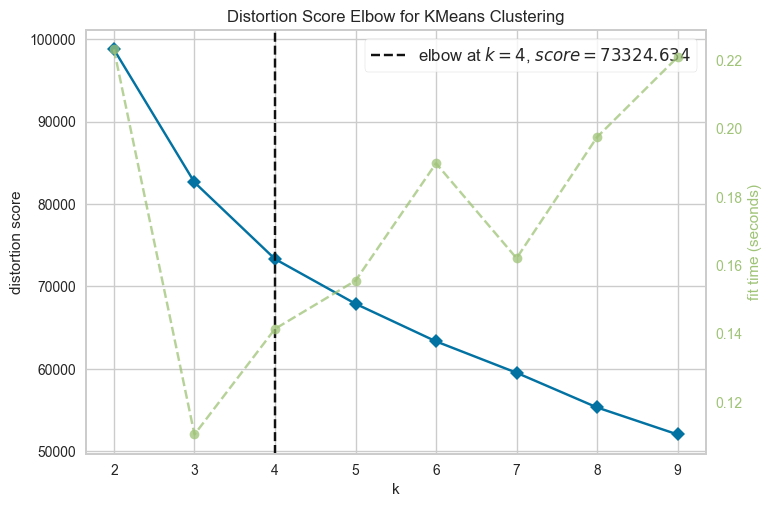

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
#Elbow method
#after preprocessing step, we can perform K-means clustering on our data.
#Find the n_clusters parameter using the elbow method
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show()      

In [72]:
 #it seems the best value for k is 4, it has clear elbow at k-=4
#random_state=42 , we get the same train and test sets across different executions,

km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(pca_data)



In [73]:
#Now I add these labels to 3 dataframes:

#cc_data: original dataframe
#std_imp_data: imputed, standard dataframe
#pca_data: Transformed data after PCA
    
cc_data['LABELS'] = labels
std_imp_data['LABELS'] = labels
pca_data['LABELS'] = labels

<AxesSubplot: ylabel='LABELS'>

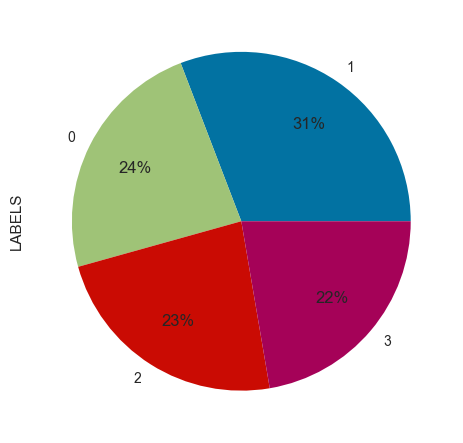

In [74]:
 #data is distributed among these 4 clusters:

pca_data.LABELS.value_counts().plot.pie(autopct='%2.0f%%', pctdistance=0.7, labeldistance=1.1)

To see how good/bad is our model.

we start by caculating below metric:

The Silhouette Coefficient is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.

In [75]:

print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')


Silhouette Score = 0.23861213385970703


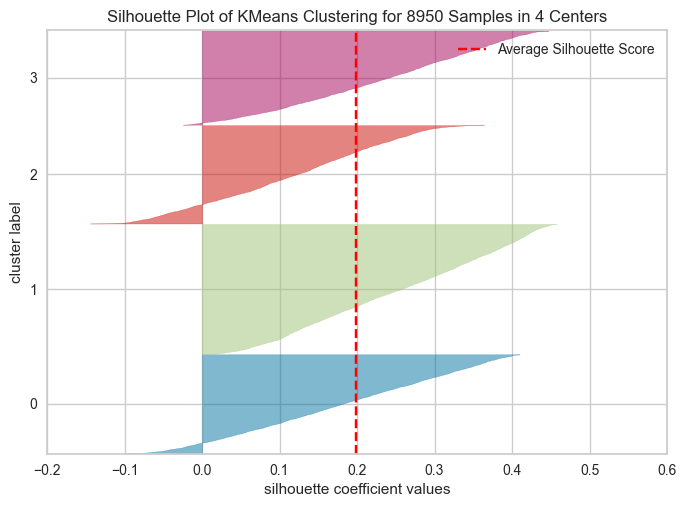

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:

#Silhouette Plot:

visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(pca_data.drop(['LABELS'],axis=1))
visualizer.show()

Here, the vertical dotted red line in this plot is the average score. It looks like our clustering method is good, since each cluster bumps out above the average, and the cluster scores look decent.